# Stacking base models to create one combined model

All the models have been saved as `.joblib` files so first we must load them in to this notebook.

In [ ]:
import joblib
# Load the models
DecisionTree = joblib.load('decisionTree.joblib')
LogisticRegression = joblib.load('.joblib')
KNN = joblib.load('.joblib')
SVM = joblib.load('.joblib')

Now import all the `sklearn` packages that will be needed and our data sets.:

In [ ]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier

In [ ]:
df = pd.read_csv("my_full_data.csv")

X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Creating the stacked model

First, we will make a list of all the base models that we are going to use.

In [ ]:
base_classifiers = [
    ('DecisionTree', DecisionTree),
    ('LogisticRegression', LogisticRegression),
    ('KNN', KNN),
    ('SVM', SVM)
]

Now create the stacked model and fit to the training data. We can then measure its performance against the test data.

In [ ]:
StackedModel = StackingClassifier(estimators = base_classifiers, cv = 3)

In [ ]:
StackedModel = stackedModel.fit(X_train,y_train)

In [ ]:
ypred = stackedModel.predict(X_test)

In [ ]:
print('The accuracy of the stacked model is:',accuracy_score(y_test, ypred)*100)

## Plotting ROC curve vor stacked and base models

In [ ]:
yProbPred = StackedModel.predict_proba(X_test)

# printing an ROC curve

y_Pred_DecisionTree = DecisionTree.predict_proba(X_test)
y_Pred_LogisticRegression = LogisticRegression.predict_proba(X_test)
y_Pred_KNN = KNN.predict_proba(X_test)
y_Pred_SVM = SVM.predict_proba(X_test)

# Calculate true positive rate and false positive rate
fpr5, tpr5, _ = metrics.roc_curve(y_test, y5_hat[:,1])
#fpr, tpr, _ = metrics.roc_curve(y_test, y_hat)
#fpr2, tpr2, _ = metrics.roc_curve(y_bal_test, y2_hat)
fpr3, tpr3, _ = metrics.roc_curve(y_test, y3_hat)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y1_hat)
# Plot the ROC curve
plt.plot(fpr5, tpr5, color='blue', label='Final model')
plt.plot(fpr2, tpr2, color='red', label='On balanced data')

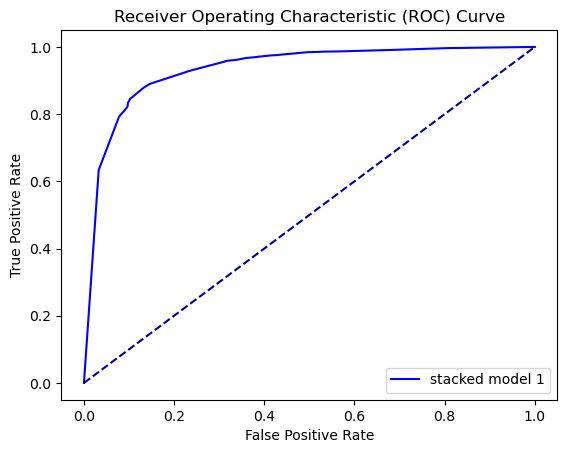

In [69]:

fprStacked, tprStacked, _ = metrics.roc_curve(y_test, yProbPred[:,1])
fprDecisionTree, tprDecisionTree, _ = metrics.roc_curve(y_test, y_Pred_DecisionTree[:,1])
fprLogisticRegression, tprLogisticRegression, _ = metrics.roc_curve(y_test, y_Pred_LogisticRegression[:,1])
fprKNN, tprKNN, _ = metrics.roc_curve(y_test, y_Pred_KNN[:,1])
fprSVM, tprSVM, _ = metrics.roc_curve(y_test, y_Pred_SVM[:,1])


plt.plot(fprStacked, tprStacked, color='blue', label = 'stacked model')
plt.plot(fprDecisionTree, tprDecisionTree, color='green', label = 'Decision Tree')
plt.plot(fprLogisticRegression, tprLogisticRegression, color='purple', label = 'Logistic Regression')
plt.plot(fprKNN, tprKNN, color='red', label = 'KNN')
plt.plot(fprSVM, tprSVM, color='orange', label = 'SVM')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()